In [3]:
# !pip install sklearn

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### seaborn 을 이용한 데이터 시각화

In [8]:
# !pip install seaborn
# Downloading seaborn-0.11.2-py3-none-any.whl (292 kB)

In [9]:
import seaborn as sns
iris_pd = sns.load_dataset('iris')
iris_pd.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


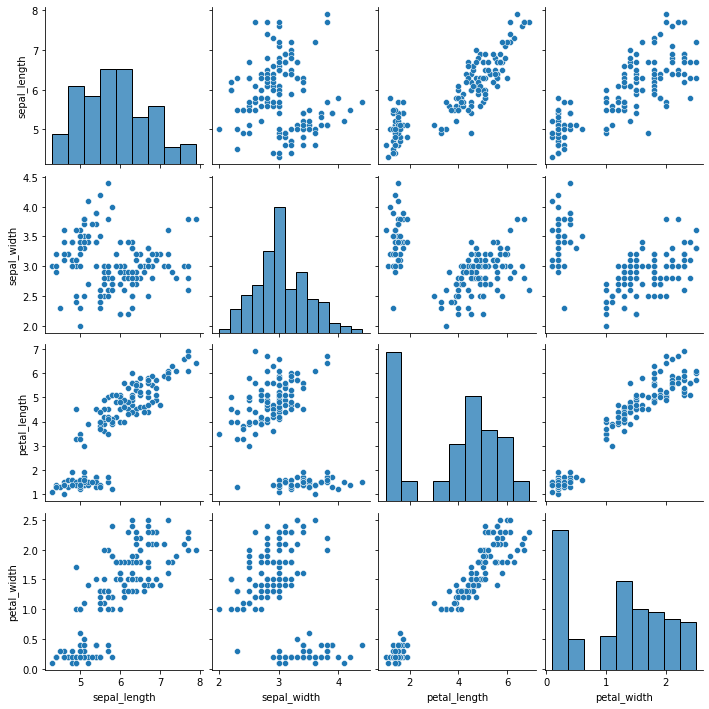

In [10]:
# iris의 4가지 특성을 가지고 16개의 비교 그림을 그려보자
sns.pairplot(iris_pd)

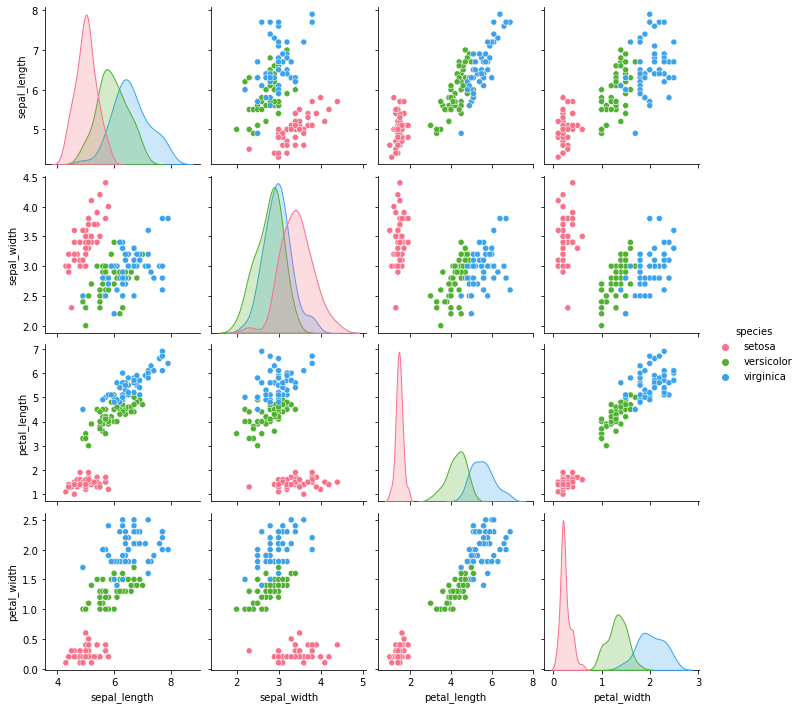

In [11]:
# hue 옵션을 사용해 종별로 색상을 구분할 수 있다. husl을 통해 색상 셋을 바꿀 수 있다,ㅁ
sns.pairplot(iris_pd, hue='species', palette='husl')

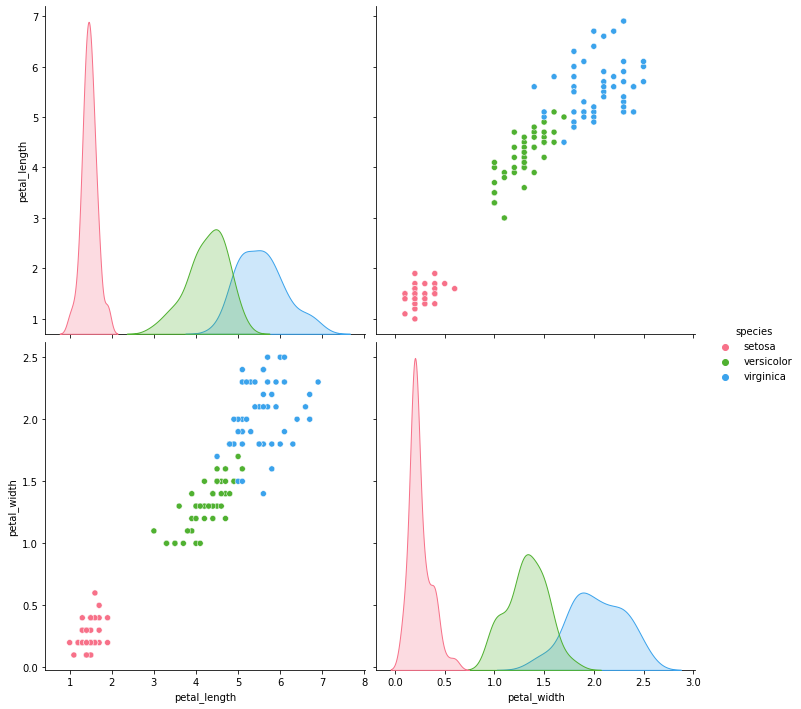

In [12]:
# 세 종을 가장 잘 구분 할 수 있는 것은 petal_length 와 petal_width 로 보인다. 이 두 가지를 더 자세하게 그려보자
sns.pairplot(data = iris_pd     # 그릴 데이터
             , height=5         # 그래프 크기
             , vars=['petal_length', 'petal_width'] # 사용할 변수 #x_var, y_var 로 따로 설정 할 수도 있다
             , hue='species'    # 종별로 다른 색상 적용
             , palette='husl'   # 색상셋
             )

### 모델을 만들기 전에 모델을 보여주는데 도움이 되는 Graphviz 를 사용하자

1. 홈페이지에서 우선 다운로드: https://graphviz.org/download/
2. pip install graphvizg
3. 환경변수 설정: 고급 시스템 설정 -> 환경 변수 설정 -> 위 쪽에서 PATH 선택 -> C:/Program Files/Graphviz 와 C:/Program Files/Graphviz/bin 추가 -> 재부팅

In [13]:
# !pip install graphviz

In [15]:
from sklearn.tree import DecisionTreeClassifier # 결정나무 알고리즘 사용

X = iris.data[:,2:] # petal legth와 width 만 사용
Y = iris.target

In [16]:
tree_clf = DecisionTreeClassifier(max_depth=2   # 깊이 지정
                                  , random_state=13)
tree_clf.fit(X, Y)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [18]:
# graphviz 를 사용해보자
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf   # 저장할 모델
    , out_file='D:/nuguna_python-1/data/06_data/iris_tree.dot' # 저장 경로
    , feature_names = ['petal length', 'petal width']   # 특성 이름
    , class_names = iris.target_names   # 레이블 이블
    , rounded = True    # 
    , filled=True
)

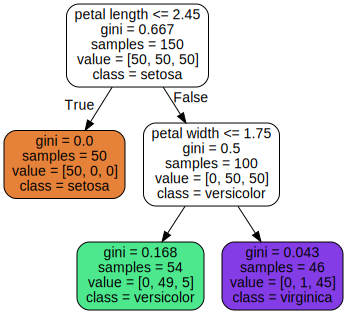

In [19]:
import graphviz
with open('D:/nuguna_python-1/data/06_data/iris_tree.dot') as f:
    dot_graph = f.read()
    
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='D:/nuguna_python-1/data/06_data', cleanup=True)
dot

In [20]:
# 이렇게 모델이 데이터를 구분한 이유를 설명할 수 있는 것을 화이트박스라 한다.
# 최근 더욱 발전되고 있는 딥러닝은 이 이유를 명확히 설명 할 수 없기 떄문에 블랙박스라고 부른다.

### 학습한 모델을 사용하기

In [22]:
# 모델이 예측한 확률을 확인
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [24]:
# 간단하게 결과 바로 확인하기
iris.target_names[tree_clf.predict([[5, 1.5]])]

array(['versicolor'], dtype='<U10')